## Adegenet

In [1]:
library(adegenet)
library(pegas)
library(hierfstat)
library(ggplot2)
library(dplyr)
library(reshape2)
setwd("/home/ksil91/Projects/Ostrea/over10k-min75H32/")

Loading required package: ade4

   /// adegenet 2.0.1 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()


Loading required package: ape

Attaching package: ‘pegas’

The following object is masked from ‘package:ape’:

    mst

The following object is masked from ‘package:ade4’:

    amova


Attaching package: ‘hierfstat’

The following objects are masked from ‘package:ape’:

    pcoa, varcomp

The following object is masked from ‘package:adegenet’:

    read.fstat


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
inputfile = "o10k-min75H32-exRepu.str"
Sys.setenv(IN="o10k-min75H32-exRepu.str")

In [3]:
nloci = -2+as.numeric(system("awk '{print NF}' ${IN} | sort -nu | tail -n 1", intern=TRUE))
nloci

[1] 1791

In [4]:
system("wc -l ${IN}", intern=TRUE)

[1] "425 o10k-min75H32-exRepu.str"

In [5]:
nind = 424/2
nind

[1] 212

In [70]:
ind_data <- read.structure(inputfile, n.ind=nind,n.loc=nloci,onerowperind=FALSE,
                           col.lab=1,col.pop=2,row.marknames=1, ask=FALSE)
ind_data


 Converting data from a STRUCTURE .stru file to a genind object... 



/// GENIND OBJECT /////////

 // 212 individuals; 1,791 loci; 3,601 alleles; size: 3.8 Mb

 // Basic content
   @tab:  212 x 3601 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 1-3)
   @loc.fac: locus factor for the 3601 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: read.structure(file = inputfile, n.ind = nind, n.loc = nloci, 
    onerowperind = FALSE, col.lab = 1, col.pop = 2, row.marknames = 1, 
    ask = FALSE)

 // Optional content
   @pop: population of each individual (group size range: 9-16)

In [71]:
poptable = read.table("structure_outputs/o10kexRepu_19pop.distruct",header=FALSE)
old_pops <- ind_data@pop
new_pops = {}
for (i in 1:length(old_pops)){
    new_pops[i] = as.character(poptable$V2[match(old_pops[i],poptable$V1)])
}
pop(ind_data) <- new_pops
sum_ind <- summary(ind_data)
names(sum_ind)

[1] "n"         "n.by.pop"  "loc.n.all" "pop.n.all" "NA.perc"   "Hobs"     
[7] "Hexp"

In [31]:
loc_cov <- propTyped(ind_data, by = "loc")
ind_cov <- propTyped(ind_data, by = "ind")

In [48]:
ind_cov[which(ind_cov < 0.25)]

BC3_12      BC4_17       CA1_1      CA6_15       CA6_8     Conch_1 
0.245672808 0.242881072 0.184812954 0.175879397 0.096594082 0.205471803 
   Conch_21    Conch_26       OR2_7    OR3_3w_7      WA13_5       WA1_8 
0.007816862 0.248464545 0.248464545 0.145170296 0.225572306 0.149078727

In [56]:
ind_data_25 <- ind_data[which(ind_cov > 0.25), , drop =TRUE]
loc_cov_25 <- propTyped(ind_data_25, by = "loc")
ind_data50_25 <- ind_data_25[,loc = which(loc_cov_25 > 0.5)]
ind_data50_25
sum_ind50_25 <- summary(ind_data50_25)

/// GENIND OBJECT /////////

 // 200 individuals; 1,775 loci; 3,532 alleles; size: 3.5 Mb

 // Basic content
   @tab:  200 x 3532 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 1-3)
   @loc.fac: locus factor for the 3532 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: .local(x = x, i = i, j = j, loc = ..1, drop = drop)

 // Optional content
   @pop: population of each individual (group size range: 6-15)

In [35]:
ind_data50 <- ind_data[,loc = which(loc_cov > 0.5)]
ind_data50
sum_ind50 <- summary(ind_data50)

/// GENIND OBJECT /////////

 // 212 individuals; 1,775 loci; 3,569 alleles; size: 3.7 Mb

 // Basic content
   @tab:  212 x 3569 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 1-3)
   @loc.fac: locus factor for the 3569 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: .local(x = x, i = i, j = j, loc = ..1, drop = drop)

 // Optional content
   @pop: population of each individual (group size range: 9-16)

In [98]:
ind_noc50_25 <- ind_data50_25[which(ind_data50_25@pop != "Conchaphila"), , drop=TRUE]
ind_noc50_25

/// GENIND OBJECT /////////

 // 194 individuals; 1,775 loci; 3,183 alleles; size: 3.1 Mb

 // Basic content
   @tab:  194 x 3183 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 1-3)
   @loc.fac: locus factor for the 3183 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: .local(x = x, i = i, j = j, drop = drop)

 // Optional content
   @pop: population of each individual (group size range: 9-15)

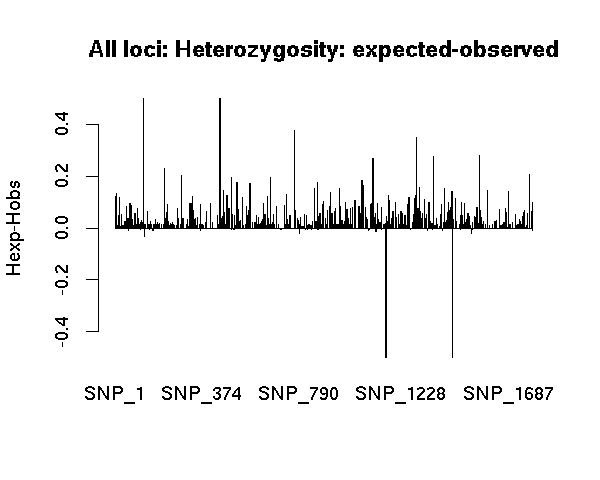

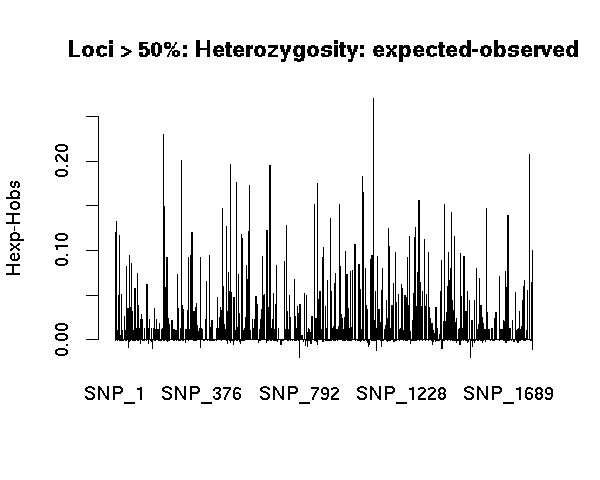

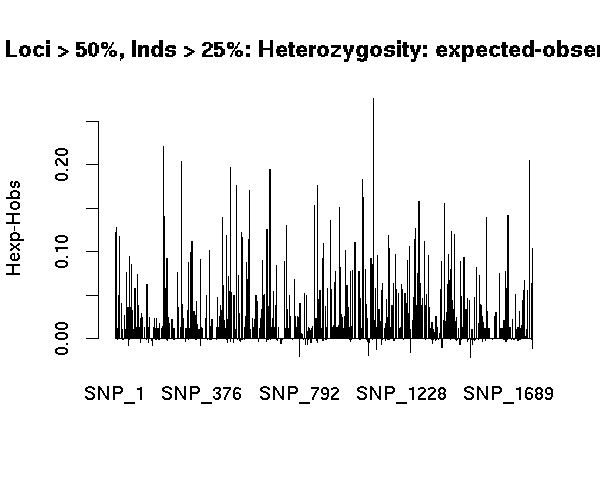

In [57]:
barplot(sum_ind$Hexp-sum_ind$Hobs, main = "All loci: Heterozygosity: expected-observed", ylab="Hexp-Hobs")
barplot(sum_ind50$Hexp-sum_ind50$Hobs, main = "Loci > 50%: Heterozygosity: expected-observed", ylab="Hexp-Hobs")
barplot(sum_ind50_25$Hexp-sum_ind50_25$Hobs, main = "Loci > 50%, Inds > 25%: Heterozygosity: expected-observed", ylab="Hexp-Hobs")

In [37]:
bartlett.test(list(sum_ind50$Hexp,sum_ind50$Hobs))
t.test(sum_ind50$Hexp,sum_ind50$Hobs,pair=T,var.equal=TRUE,alter="greater")


	Bartlett test of homogeneity of variances

data:  list(sum_ind50$Hexp, sum_ind50$Hobs)
Bartlett's K-squared = 77.958, df = 1, p-value < 2.2e-16



	Paired t-test

data:  sum_ind50$Hexp and sum_ind50$Hobs
t = 16.96, df = 1774, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.01026831        Inf
sample estimates:
mean of the differences 
             0.01137176 


In [58]:
bartlett.test(list(sum_ind50_25$Hexp,sum_ind50_25$Hobs))
t.test(sum_ind50_25$Hexp,sum_ind50_25$Hobs,pair=T,var.equal=TRUE,alter="greater")


	Bartlett test of homogeneity of variances

data:  list(sum_ind50_25$Hexp, sum_ind50_25$Hobs)
Bartlett's K-squared = 75.993, df = 1, p-value < 2.2e-16



	Paired t-test

data:  sum_ind50_25$Hexp and sum_ind50_25$Hobs
t = 16.697, df = 1774, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.01002067        Inf
sample estimates:
mean of the differences 
             0.01111633 


Observed H is significantly lower than mean expected H.

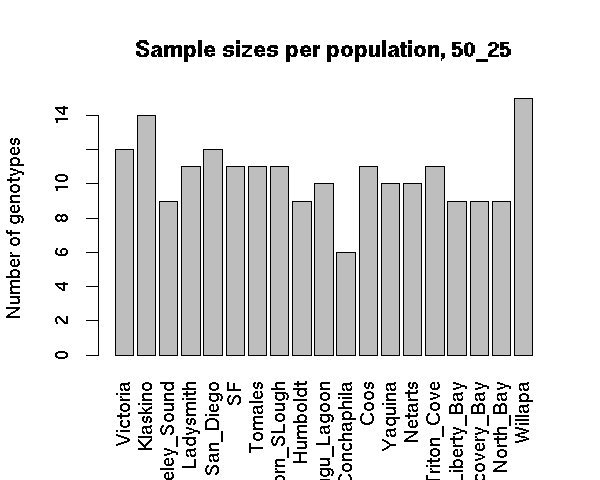

In [75]:
options(repr.plot.width=5,repr.plot.height=4)
barplot(sum_ind50_25$n.by.pop, main="Sample sizes per population, 50_25", ylab="Number of genotypes",las=3)

In [76]:
sum_ind$NA.perc
sum_ind50$NA.perc
sum_ind50_25$NA.perc

[1] 24.18434

[1] 23.59474

[1] 20.10676

In [79]:
pop_data <- genind2genpop(ind_data)
pop_data


 Converting data from a genind to a genpop object... 

...done.



/// GENPOP OBJECT /////////

 // 19 populations; 1,791 loci; 3,601 alleles; size: 1.1 Mb

 // Basic content
   @tab:  19 x 3601 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 1-3)
   @loc.fac: locus factor for the 3601 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: genind2genpop(x = ind_data)

 // Optional content
   - empty -

In [80]:
pop_data50_25 <- genind2genpop(ind_data50_25)


 Converting data from a genind to a genpop object... 

...done.



In [82]:
sum_pop <- summary(pop_data)
sum_pop50_25 <- summary(pop_data50_25)
names(sum_pop)

[1] "n.pop"     "loc.n.all" "pop.n.all" "NA.perc"

In [83]:
popNames(pop_data) 

[1] "Victoria"       "Klaskino"       "Barkeley_Sound" "Ladysmith"     
 [5] "San_Diego"      "SF"             "Tomales"        "Elkhorn_SLough"
 [9] "Humboldt"       "Mugu_Lagoon"    "Conchaphila"    "Coos"          
[13] "Yaquina"        "Netarts"        "Triton_Cove"    "Liberty_Bay"   
[17] "Discovery_Bay"  "North_Bay"      "Willapa"

In [85]:
library("hierfstat")
fstat(ind_data50_25)

,pop,Ind
Total,0.1082965,0.2000208
pop,0.0000000,0.1028641


In [86]:
fst_loci50_25 <- Fst(as.loci(ind_data50_25))

In [ ]:
#Gtest <- gstat.randtest(ind_data, nsim =99)
#Gtest

In [170]:
#Nei FST as imlemented in hierfstat
distFst <- pairwise.fst(ind_data50_25)

Warning message in df2genind(tab, ploidy = newPloidy, type = x[[1]]@type, sep = "/"):
“entirely non-type marker(s) deleted”Warning message in df2genind(tab, ploidy = newPloidy, type = x[[1]]@type, sep = "/"):
“entirely non-type marker(s) deleted”Warning message in df2genind(tab, ploidy = newPloidy, type = x[[1]]@type, sep = "/"):
“entirely non-type marker(s) deleted”Warning message in df2genind(tab, ploidy = newPloidy, type = x[[1]]@type, sep = "/"):
“entirely non-type marker(s) deleted”Warning message in df2genind(tab, ploidy = newPloidy, type = x[[1]]@type, sep = "/"):
“entirely non-type marker(s) deleted”Warning message in df2genind(tab, ploidy = newPloidy, type = x[[1]]@type, sep = "/"):
“entirely non-type marker(s) deleted”Warning message in df2genind(tab, ploidy = newPloidy, type = x[[1]]@type, sep = "/"):
“entirely non-type marker(s) deleted”Warning message in df2genind(tab, ploidy = newPloidy, type = x[[1]]@type, sep = "/"):
“entirely non-type marker(s) deleted”Warning message 

In [230]:
matFst <- as.matrix(distFst, rownames.force=TRUE)
rownames(matFst) <- popNames(pop_data)
colnames(matFst) <- popNames(pop_data)
matFst[]
melted <- melt(matFst, na.rm =TRUE)
melted

,Victoria,Klaskino,Barkeley_Sound,Ladysmith,San_Diego,SF,Tomales,Elkhorn_SLough,Humboldt,Mugu_Lagoon,Conchaphila,Coos,Yaquina,Netarts,Triton_Cove,Liberty_Bay,Discovery_Bay,North_Bay,Willapa
Victoria,0.00000000,0.04343604,0.05495996,0.05914876,0.05010461,0.03158665,0.04408568,0.06449366,0.04015929,0.07483689,0.10938784,0.08054012,0.05293486,0.04494845,0.03176198,0.06527189,0.02697077,0.03821443,0.06069611
Klaskino,0.043436043,0.000000000,0.031773187,0.009513565,0.059526207,0.038533614,0.055948266,0.045029927,0.038393307,0.065804099,0.095266674,0.041839911,0.047935057,0.046724134,0.024269650,0.024868264,0.043070710,0.016520859,0.043203090
Barkeley_Sound,0.05495996,0.03177319,0.00000000,0.03050271,0.04790773,0.03228563,0.06758697,0.04879012,0.05124075,0.06411841,0.10766551,0.05456662,0.06266271,0.05197424,0.03251452,0.04634486,0.07491609,0.04304283,0.04937218
Ladysmith,0.059148764,0.009513565,0.030502715,0.000000000,0.061226983,0.065025018,0.055076140,0.072945465,0.035345657,0.096494944,0.127043674,0.075115877,0.076406332,0.052073069,0.020414709,0.041095640,0.029843957,0.042880689,0.045468546
San_Diego,0.05010461,0.05952621,0.04790773,0.06122698,0.00000000,0.03749940,0.06677215,0.02517828,0.04626060,0.01410516,0.09419617,0.07200568,0.05704614,0.06882306,0.05549882,0.03764738,0.08876335,0.05040255,0.09847500
SF,0.03158665,0.03853361,0.03228563,0.06502502,0.03749940,0.00000000,0.03062339,0.03060416,0.01380130,0.06192697,0.10303001,0.05322331,0.03191023,0.04719111,0.05384570,0.04557894,0.06280890,0.04371178,0.06344844
Tomales,0.04408568,0.05594827,0.06758697,0.05507614,0.06677215,0.03062339,0.00000000,0.05507475,0.04644930,0.07041184,0.15471990,0.07161546,0.05073143,0.04077376,0.04310108,0.04419483,0.08431809,0.06321982,0.06511329
Elkhorn_SLough,0.06449366,0.04502993,0.04879012,0.07294547,0.02517828,0.03060416,0.05507475,0.00000000,0.03547320,0.02835190,0.08914672,0.08188363,0.06088811,0.06039505,0.06011949,0.06005323,0.09437485,0.05675467,0.09302171
Humboldt,0.04015929,0.03839331,0.05124075,0.03534566,0.04626060,0.01380130,0.04644930,0.03547320,0.00000000,0.06983493,0.12196088,0.03789071,0.04702816,0.04132499,0.01961141,0.02434677,0.05409318,0.01989320,0.05586422
Mugu_Lagoon,0.07483689,0.06580410,0.06411841,0.09649494,0.01410516,0.06192697,0.07041184,0.02835190,0.06983493,0.00000000,0.06929223,0.10291095,0.07406339,0.07869593,0.07398109,0.07496724,0.10781891,0.07049808,0.11390938


,Var1,Var2,value
1,Victoria,Victoria,0
2,Klaskino,Victoria,0.0434360429838201
3,Barkeley_Sound,Victoria,0.0549599612132915
4,Ladysmith,Victoria,0.0591487636912069
5,San_Diego,Victoria,0.0501046094784873
6,SF,Victoria,0.03158665114064
7,Tomales,Victoria,0.0440856759867297
8,Elkhorn_SLough,Victoria,0.0644936576926248
9,Humboldt,Victoria,0.0401592868040582
10,Mugu_Lagoon,Victoria,0.0748368938755237


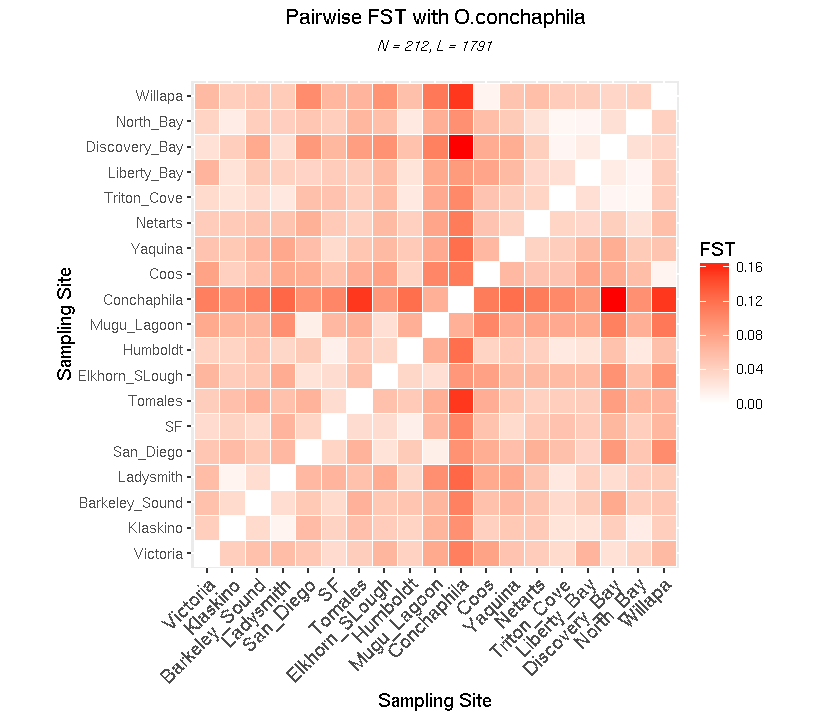

In [234]:
options(repr.plot.width=7,repr.plot.height=6)
ggplot(data = melted, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient(low = "white", high = "red", 
   name="FST")  + ggtitle(expression(atop("Pairwise FST with O.conchaphila", atop(italic("N = 212, L = 1791"), ""))))+
labs( x = "Sampling Site", y = "Sampling Site") +
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+ coord_fixed()


## PCA

In [87]:
sum(is.na(ind_data50_25$tab))

[1] 142122

In [88]:
scaled50_25 <- scaleGen(ind_data50_25, NA.method="mean")

Warning message in .local(x, ...):
“Some scaling values are null.
 Corresponding alleles are removed.”

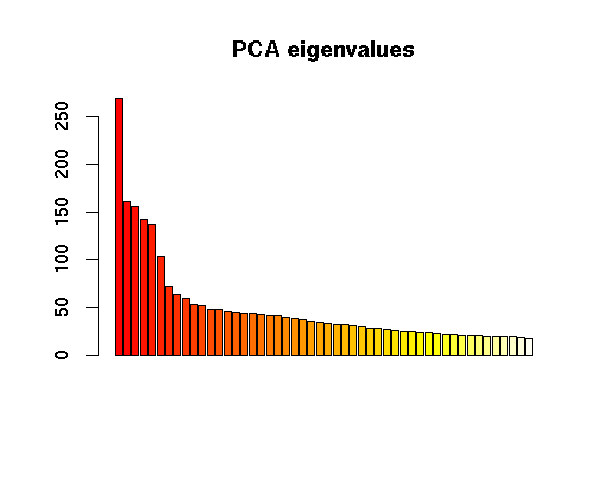

In [89]:
pca1 <- dudi.pca(scaled50_25,cent=FALSE,scale=FALSE,scannf=FALSE,nf=3)
barplot(pca1$eig[1:50],main="PCA eigenvalues", col=heat.colors(50))

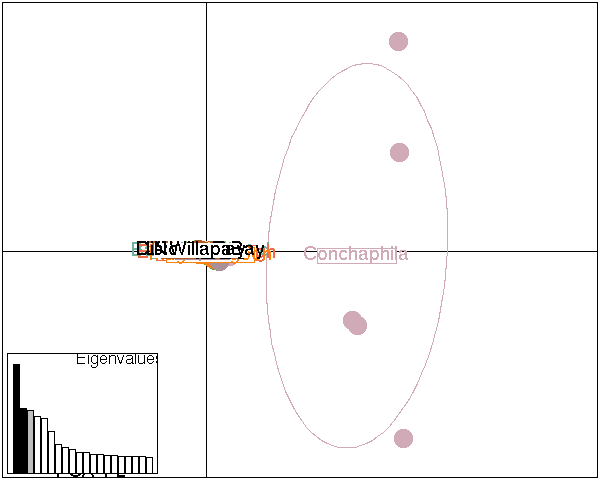

In [91]:
col <- funky(15)
s.class(pca1$li, pop(ind_data50_25),xax=1,yax=2, sub = "PCA 1-2",col=col, axesell=FALSE,
cstar=0, cpoint=3, grid=FALSE)
add.scatter.eig(pca1$eig[1:20],nf=3,xax=1,yax=2)

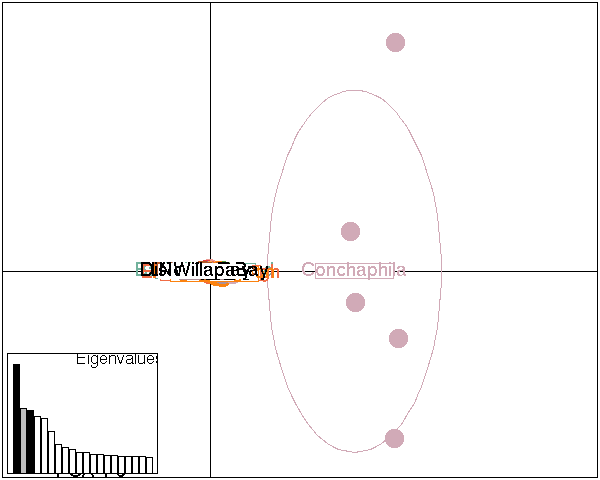

In [92]:
col <- funky(15)
s.class(pca1$li, pop(ind_data50_25),xax=1,yax=3, sub = "PCA 1-3",col=col, axesell=FALSE,
cstar=0, cpoint=3, grid=FALSE)
add.scatter.eig(pca1$eig[1:20],nf=3,xax=1,yax=3)

In [116]:
noc50_25pops <- pop(ind_noc50_25)
length(noc50_25pops)

[1] 194

In [139]:
NSpops_noc50_25 <- factor(c(rep("North",46),rep("South",95),rep("North",38),rep("South",15)))
NSpops_noc50_25ex <- factor(c(rep("North",45),rep("South",95),rep("North",38),rep("South",15)))

Warning message in .local(x, ...):
“Some scaling values are null.
 Corresponding alleles are removed.”

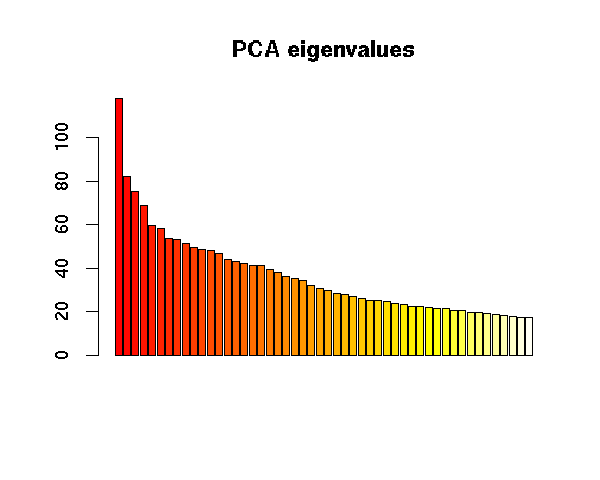

In [151]:
scalednoc50_25 <- scaleGen(ind_noc50_25, NA.method="mean")
pcanoc <- dudi.pca(scalednoc50_25,cent=FALSE,scale=FALSE,scannf=FALSE,nf=5)
barplot(pcanoc$eig[1:50],main="PCA eigenvalues", col=heat.colors(50))

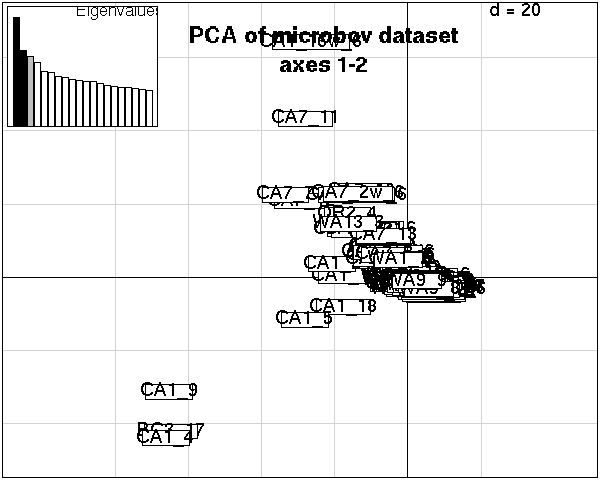

In [152]:
s.label(pcanoc$li)
title("PCA of microbov dataset\naxes 1-2")
add.scatter.eig(pcanoc$eig[1:20], 3,1,2, "topleft")

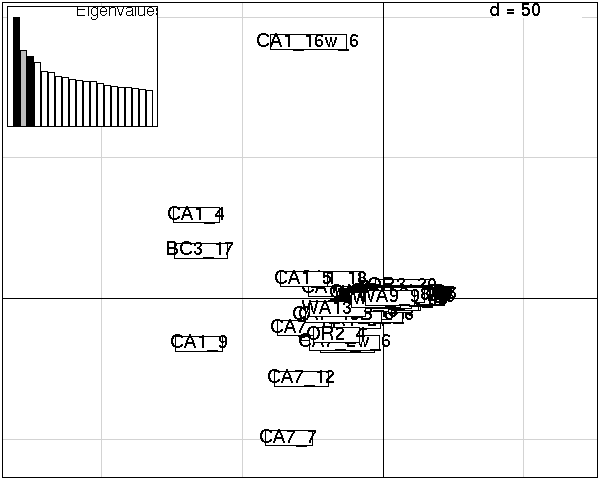

In [154]:
s.label(pcanoc$li,xax=1,yax=3)
add.scatter.eig(pcanoc$eig[1:20], 3,1,3, "topleft")

Excluding BC3_17 for now: possibly mislabeled? Should check barcode file for Run 2.

In [142]:
ind_noc50_25ex <- ind_noc50_25[which(indNames(ind_noc50_25) != "BC3_17"),, drop=TRUE]
ind_noc50_25ex

/// GENIND OBJECT /////////

 // 193 individuals; 1,775 loci; 3,171 alleles; size: 3.1 Mb

 // Basic content
   @tab:  193 x 3171 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 1-3)
   @loc.fac: locus factor for the 3171 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: .local(x = x, i = i, j = j, drop = drop)

 // Optional content
   @pop: population of each individual (group size range: 8-15)

Warning message in .local(x, ...):
“Some scaling values are null.
 Corresponding alleles are removed.”

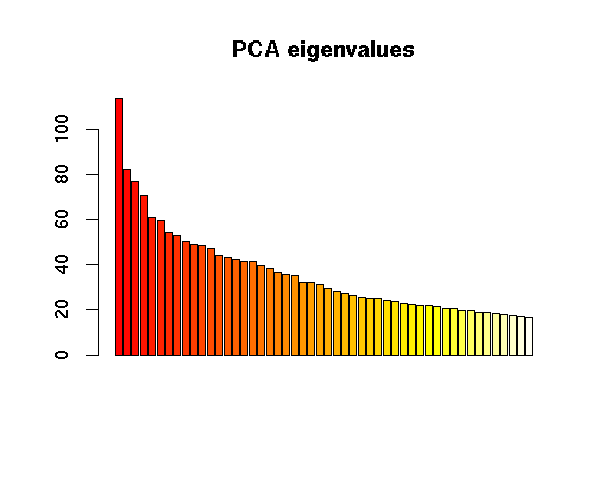

In [143]:
scalednoc50_25ex <- scaleGen(ind_noc50_25ex, NA.method="mean")
pcanocex <- dudi.pca(scalednoc50_25ex,cent=FALSE,scale=FALSE,scannf=FALSE,nf=5)
barplot(pcanocex$eig[1:50],main="PCA eigenvalues", col=heat.colors(50))

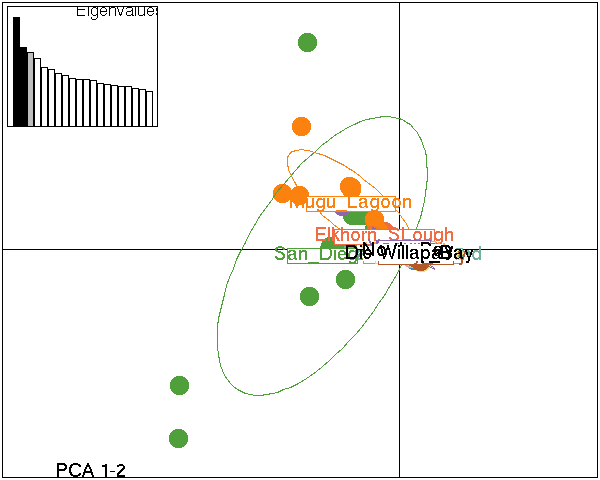

In [138]:
col <- funky(15)
s.class(pcanocex$li, pop(ind_noc50_25ex),xax=1,yax=2, sub = "PCA 1-2",col=col, axesell=FALSE,
cstar=0, cpoint=3, grid=FALSE)
add.scatter.eig(pcanocex$eig[1:20],nf=3,xax=1,yax=2,"topleft")

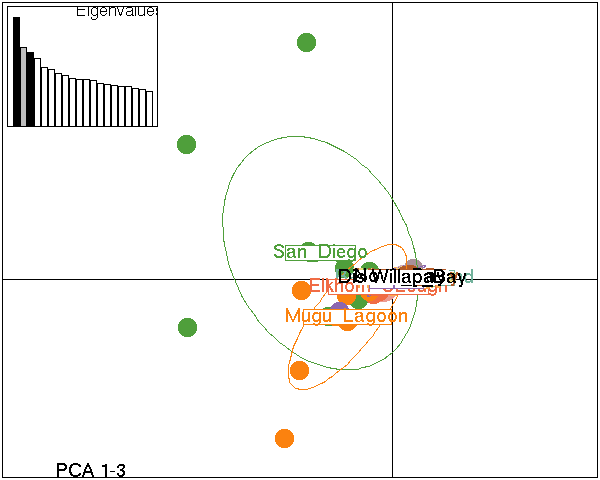

In [155]:
col <- funky(15)
s.class(pcanocex$li, pop(ind_noc50_25ex),xax=1,yax=3, sub = "PCA 1-3",col=col, axesell=FALSE,
cstar=0, cpoint=3, grid=FALSE)
add.scatter.eig(pcanocex$eig[1:20],nf=3,xax=1,yax=3,"topleft")

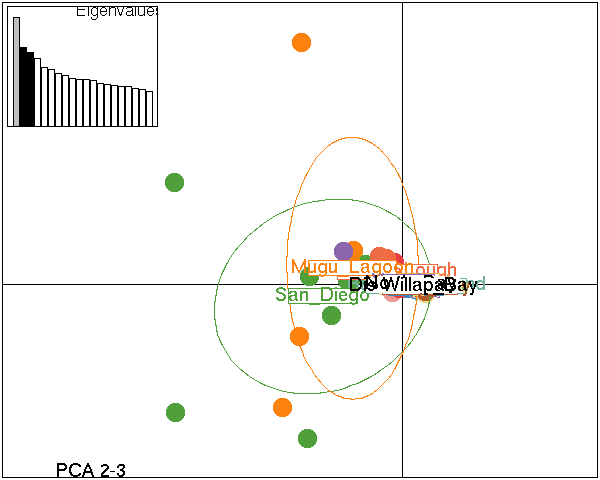

In [158]:
col <- funky(15)
s.class(pcanocex$li, pop(ind_noc50_25ex),xax=1,yax=4, sub = "PCA 2-3",col=col, axesell=FALSE,
cstar=0, cpoint=3, grid=FALSE)
add.scatter.eig(pcanocex$eig[1:20],nf=3,xax=2,yax=3,"topleft")

In [99]:
inputfile = "/home/ksil91/Projects/Ostrea/over10k-min75H32/o10k-min75H32-exRepOLu.str"
Sys.setenv(IN="/home/ksil91/Projects/Ostrea/over10k-min75H32/o10k-min75H32-exRepOLu.str")

In [100]:
nloci = -2+as.numeric(system("awk '{print NF}' ${IN} | sort -nu | tail -n 1", intern=TRUE))
nloci

[1] 1791

In [101]:
system("wc -l ${IN}", intern=TRUE)

[1] "407 /home/ksil91/Projects/Ostrea/over10k-min75H32/o10k-min75H32-exRepOLu.str"

In [102]:
nind = 406/2

In [104]:
ind_data_OL <- read.structure(inputfile, n.ind=nind,n.loc=nloci,onerowperind=FALSE,
                           col.lab=1,col.pop=2,row.marknames=1, ask=FALSE)
ind_data_OL


 Converting data from a STRUCTURE .stru file to a genind object... 



Warning message in df2genind(X = X, pop = pop, ploidy = 2, sep = sep, ncode = ncode):
“entirely non-type marker(s) deleted”

/// GENIND OBJECT /////////

 // 203 individuals; 1,790 loci; 3,265 alleles; size: 3.3 Mb

 // Basic content
   @tab:  203 x 3265 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 1-3)
   @loc.fac: locus factor for the 3265 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: read.structure(file = inputfile, n.ind = nind, n.loc = nloci, 
    onerowperind = FALSE, col.lab = 1, col.pop = 2, row.marknames = 1, 
    ask = FALSE)

 // Optional content
   @pop: population of each individual (group size range: 9-16)

In [105]:
poptable = read.table("structure_outputs/o10kexRepu_OL19pop.distruct",header=FALSE)
old_pops <- ind_data_OL@pop
new_pops = {}
for (i in 1:length(old_pops)){
    new_pops[i] = as.character(poptable$V2[match(old_pops[i],poptable$V1)])
}
pop(ind_data_OL) <- new_pops
sum_ind_OL <- summary(ind_data_OL)

In [106]:
pop_data_OL <- genind2genpop(ind_data_OL)
popNames(pop_data_OL)
sum_pop_OL <- summary(pop_data_OL)


 Converting data from a genind to a genpop object... 

...done.



[1] "Victoria"       "Klaskino"       "Barkeley_Sound" "Ladysmith"     
 [5] "San_Diego"      "SF"             "Tomales"        "Elkhorn_SLough"
 [9] "Humboldt"       "Mugu_Lagoon"    "Coos"           "Yaquina"       
[13] "Netarts"        "Triton_Cove"    "Liberty_Bay"    "Discovery_Bay" 
[17] "North_Bay"

Warning message in .local(x, ...):
“Some scaling values are null.
 Corresponding alleles are removed.”

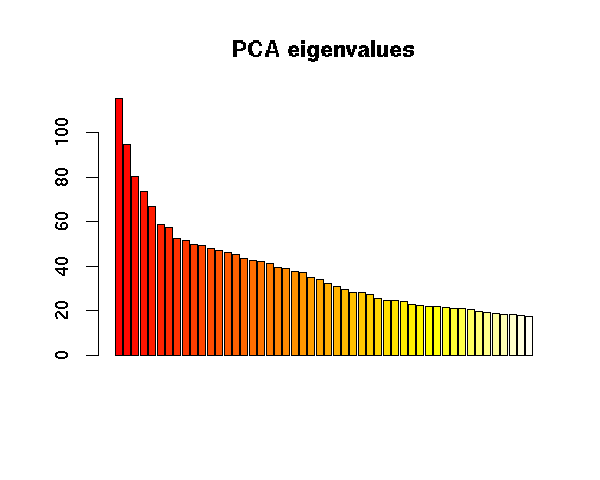

In [212]:
scaled <- scaleGen(ind_data_OL, NA.method="mean")
pca1.OL <- dudi.pca(scaled,cent=FALSE,scale=FALSE,scannf=FALSE,nf=3)
barplot(pca1.OL$eig[1:50],main="PCA eigenvalues", col=heat.colors(50))

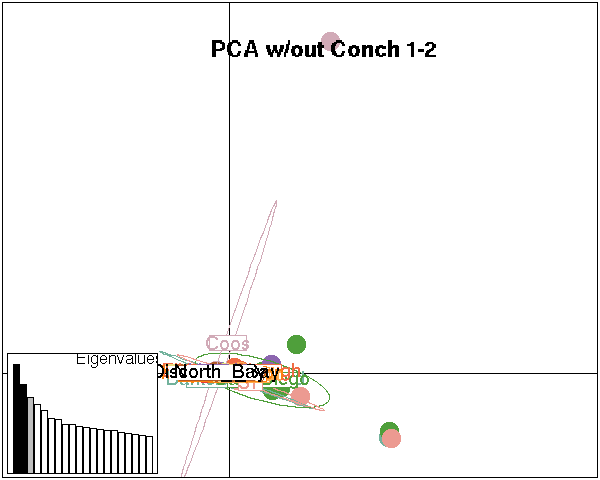

In [213]:
col <- funky(15)
s.class(pca1.OL$li, pop(ind_data_OL),xax=1,yax=2,col=col, axesell=FALSE,
cstar=0, cpoint=3, grid=FALSE)
title("PCA w/out Conch 1-2")
add.scatter.eig(pca1.OL$eig[1:20],nf=3,xax=1,yax=2)

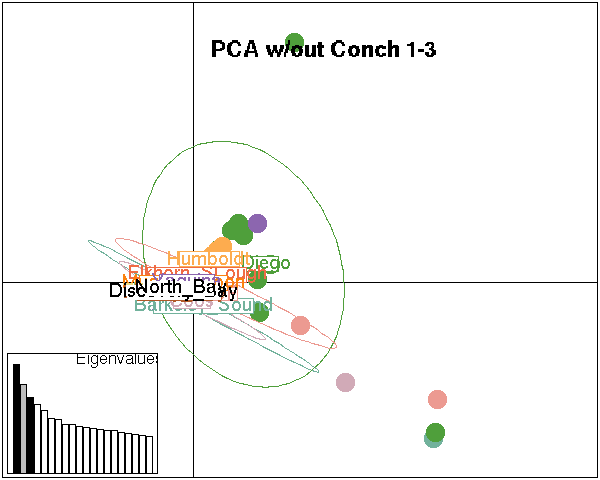

In [214]:
col <- funky(15)
s.class(pca1.OL$li, pop(ind_data_OL),xax=1,yax=3,col=col, axesell=FALSE,
cstar=0, cpoint=3, grid=FALSE)
title("PCA w/out Conch 1-3")
add.scatter.eig(pca1.OL$eig[1:20],nf=3,xax=1,yax=3)

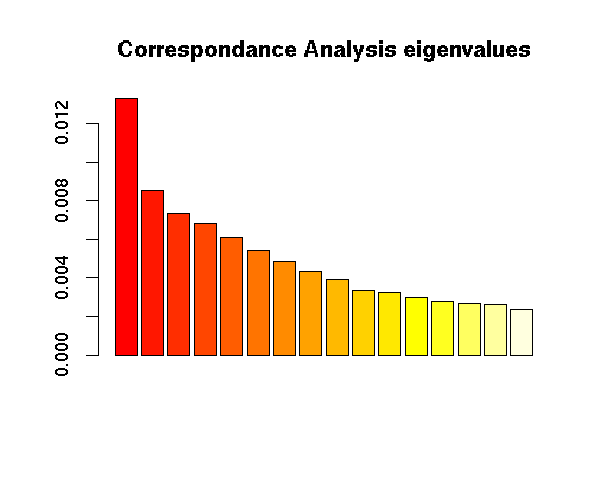

In [215]:
ca1.OL <- dudi.coa(tab(pop_data_OL),scannf=FALSE,nf=3)
barplot(ca1.OL$eig,main="Correspondance Analysis eigenvalues",
col=heat.colors(length(ca1.OL$eig)))

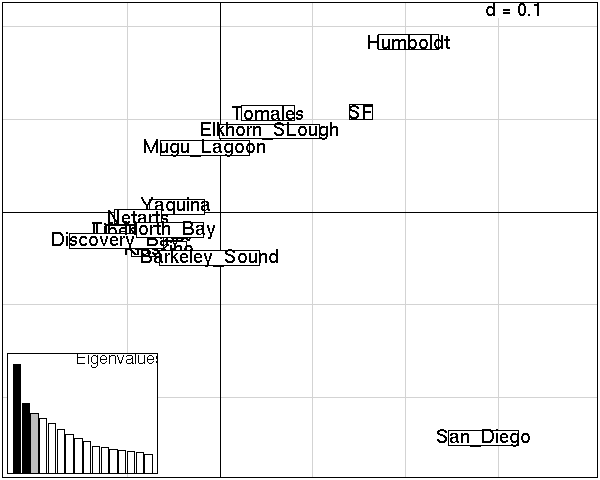

In [222]:
s.label(ca1.OL$li,xax=1,yax=2,lab=popNames(pop_data_OL),csub=2)
add.scatter.eig(ca1.OL$eig,nf=3,xax=1,yax=2,posi="bottomleft")

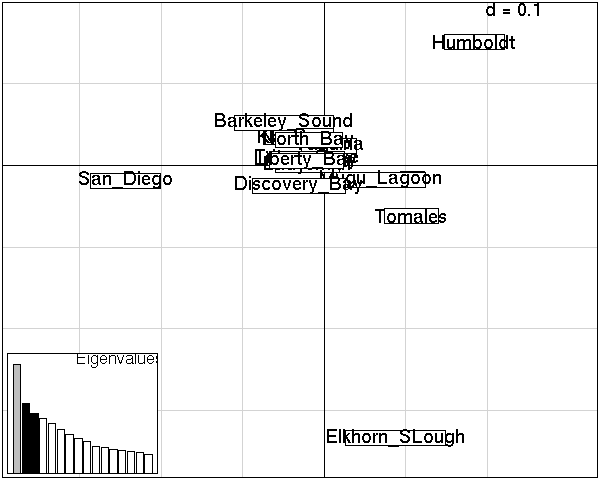

In [224]:
s.label(ca1.OL$li,xax=2,yax=3,lab=popNames(pop_data_OL),csub=2)
add.scatter.eig(ca1.OL$eig,nf=3,xax=2,yax=3,posi="bottomleft")